In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./jobs.csv')
df

,姓名,日期,岗位,薪资,年限,学历,城市,人员
0,张先生,2025-12-01 15:28:25,华聚阳招聘电工,7-8K,1-3年,学历不限,重庆,0-20人
1,彭女士,2025-12-02 15:28:25,小初全职上课老师,4-8K,1-3年,学历不限,长沙,100-499人
2,李先生,2025-12-03 15:28:25,销售助理,5-8K,经验不限,大专,南京,20-99人
3,郑先生,2025-12-04 15:28:25,汽车美容,6-9K,经验不限,本科,西安,0-20人
4,李女士,2025-12-05 15:28:25,全屋定制设计师,4-5K,1-3年,大专,南京,0-20人
5,邹先生,2025-12-06 15:28:25,曲靖云南人家招聘厨师,2-3K,经验不限,本科,重庆,100-499人
6,戴女士,2025-12-07 15:28:25,美甲师,5-6K,1-3年,大专,成都,0-20人
7,张先生,2025-12-08 15:28:25,书法老师,3-5K,1年以内,学历不限,西安,0-20人
8,邱先生,2025-12-09 15:28:25,汽车美容,5-6K,1-3年,学历不限,石家庄,0-20人
9,李女士,2025-12-10 15:28:25,化妆师,4-8K,3-5年,学历不限,大连,20-99人


1. 查看df数据前5行和后5行

In [2]:
df.head()

,姓名,日期,岗位,薪资,年限,学历,城市,人员
0,张先生,2025-12-01 15:28:25,华聚阳招聘电工,7-8K,1-3年,学历不限,重庆,0-20人
1,彭女士,2025-12-02 15:28:25,小初全职上课老师,4-8K,1-3年,学历不限,长沙,100-499人
2,李先生,2025-12-03 15:28:25,销售助理,5-8K,经验不限,大专,南京,20-99人
3,郑先生,2025-12-04 15:28:25,汽车美容,6-9K,经验不限,本科,西安,0-20人
4,李女士,2025-12-05 15:28:25,全屋定制设计师,4-5K,1-3年,大专,南京,0-20人


In [3]:
df.tail()

,姓名,日期,岗位,薪资,年限,学历,城市,人员
12,蒋先生,2025-12-13 15:28:25,汽车美容,3-4K,1-3年,学历不限,桂林,10000人以上
13,李先生,2025-12-14 15:28:25,办公室文员,2-3K,1-3年,本科,重庆,0-20人
14,张女士,2025-12-15 15:28:25,舞蹈教师,8-9K,1年以内,学历不限,长沙,0-20人
15,王先生,2025-12-16 15:28:25,办公室主任 文员,2-3K,3-5年,学历不限,贵阳,0-20人
16,曹女士,2025-12-17 15:28:25,物理教师,5-9K,1年以内,硕士,宁波,1000-9999人


2. 将'薪资'列数据转换为最大值与最小值的平均值

In [4]:
def func_mean(df_col):
    min_salary = float(df_col['薪资'].split('-')[0])
    max_salary = float(df_col['薪资'].split('-')[1].rstrip('K'))
    return (min_salary + max_salary) / 2
    
df['平均薪资'] = df.apply(func_mean, axis=1)
print(df['平均薪资'])

0     7.5
1     6.0
2     6.5
3     7.5
4     4.5
5     2.5
6     5.5
7     4.0
8     5.5
9     6.0
10    5.5
11    4.5
12    3.5
13    2.5
14    8.5
15    2.5
16    7.0
Name: 平均薪资, dtype: float64


3. 将数据根据'学历'进行分组并计算平均薪资

In [5]:
def sal_mean(str):
    values = str.replace('K', '').split('-')
    values_res = [int(i) for i in values]
    return sum(values_res)/2

df['薪资'] = df['薪资'].apply(sal_mean)

result = df.groupby('学历')['薪资'].mean()
print(result)

学历
大专      5.500000
学历不限    5.437500
本科      4.166667
硕士      7.000000
高中      5.000000
Name: 薪资, dtype: float64


4. 将'日期'列时间转换为月-日

In [6]:
df['日期'] = pd.to_datetime(df['日期'])
df['日期'] = df['日期'].dt.strftime('%m-%d')
df

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5
4,李女士,12-05,全屋定制设计师,4.5,1-3年,大专,南京,0-20人,4.5
5,邹先生,12-06,曲靖云南人家招聘厨师,2.5,经验不限,本科,重庆,100-499人,2.5
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5
7,张先生,12-08,书法老师,4.0,1年以内,学历不限,西安,0-20人,4.0
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0


5. 查看索引、数据类型和内存信息

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   姓名      17 non-null     object 
 1   日期      17 non-null     object 
 2   岗位      17 non-null     object 
 3   薪资      17 non-null     float64
 4   年限      17 non-null     object 
 5   学历      17 non-null     object 
 6   城市      17 non-null     object 
 7   人员      17 non-null     object 
 8   平均薪资    17 non-null     float64
dtypes: float64(2), object(7)
memory usage: 1.3+ KB


6. 查看'数值型'列的汇总统计

In [8]:
df.describe()

,薪资,平均薪资
count,17.000000,17.000000
mean,5.264706,5.264706
std,1.855041,1.855041
min,2.500000,2.500000
25%,4.000000,4.000000
50%,5.500000,5.500000
75%,6.500000,6.500000
max,8.500000,8.500000


7. 新增一列根据'平均薪资'将数据分为三组

In [9]:
bins = [0, 4, 7, 10]
group_level = ['低', '中', '高']
df['薪资范围'] = pd.cut(df['平均薪资'], bins=bins, labels=group_level)
df

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资,薪资范围
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5,高
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0,中
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5,中
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5,高
4,李女士,12-05,全屋定制设计师,4.5,1-3年,大专,南京,0-20人,4.5,中
5,邹先生,12-06,曲靖云南人家招聘厨师,2.5,经验不限,本科,重庆,100-499人,2.5,低
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5,中
7,张先生,12-08,书法老师,4.0,1年以内,学历不限,西安,0-20人,4.0,低
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5,中
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0,中


8. 按照'平均薪资'列对数据进行降序排序

In [10]:
df.sort_values(by='平均薪资', ascending=False)

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资,薪资范围
14,张女士,12-15,舞蹈教师,8.5,1年以内,学历不限,长沙,0-20人,8.5,高
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5,高
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5,高
16,曹女士,12-17,物理教师,7.0,1年以内,硕士,宁波,1000-9999人,7.0,中
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5,中
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0,中
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0,中
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5,中
10,宁女士,12-11,美容师美术师,5.5,经验不限,高中,重庆,0-20人,5.5,中
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5,中


9. 取出第13行的数据

In [11]:
df.loc[14]

姓名        张女士
日期      12-15
岗位       舞蹈教师
薪资        8.5
年限       1年以内
学历       学历不限
城市         长沙
人员      0-20人
平均薪资      8.5
薪资范围        高
Name: 14, dtype: object

10. 计算'平均薪资'列的中位数

In [12]:
np.median(df['平均薪资'])

5.5

11. 绘制薪资水平频率分布直方图

<Axes: ylabel='Frequency'>

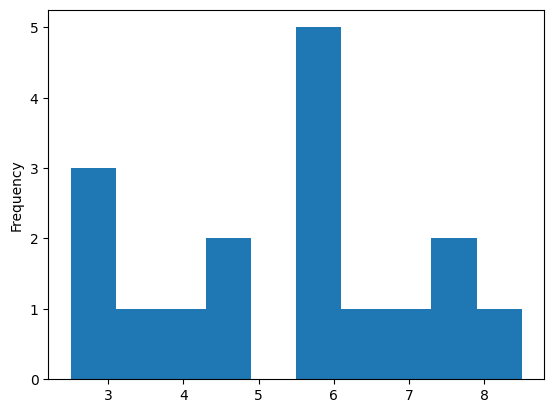

In [13]:
df['平均薪资'].plot(kind='hist')

12. 绘制薪资水平密度曲线

<Axes: ylabel='Density'>

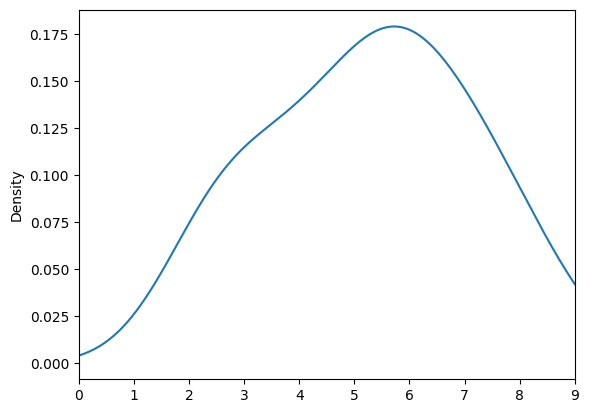

In [14]:
df['平均薪资'].plot(kind='kde', xlim=(0,9))

13. 删除最后一列

In [15]:
df.drop(columns='薪资范围', inplace=True)
df

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5
4,李女士,12-05,全屋定制设计师,4.5,1-3年,大专,南京,0-20人,4.5
5,邹先生,12-06,曲靖云南人家招聘厨师,2.5,经验不限,本科,重庆,100-499人,2.5
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5
7,张先生,12-08,书法老师,4.0,1年以内,学历不限,西安,0-20人,4.0
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0


14. 将df的'薪资'列和'平均薪资'列合并为新的一列

In [17]:
df['合并薪资'] = df['薪资'] + df['平均薪资']
df['姓名和学历'] = df['姓名'] + df['学历']
df

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资,合并薪资,姓名和学历
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5,15.0,张先生学历不限
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0,12.0,彭女士学历不限
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5,13.0,李先生大专
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5,15.0,郑先生本科
4,李女士,12-05,全屋定制设计师,4.5,1-3年,大专,南京,0-20人,4.5,9.0,李女士大专
5,邹先生,12-06,曲靖云南人家招聘厨师,2.5,经验不限,本科,重庆,100-499人,2.5,5.0,邹先生本科
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5,11.0,戴女士大专
7,张先生,12-08,书法老师,4.0,1年以内,学历不限,西安,0-20人,4.0,8.0,张先生学历不限
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5,11.0,邱先生学历不限
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0,12.0,李女士学历不限


15. 将日期列设置为索引

In [18]:
df.set_index('日期')

,姓名,岗位,薪资,年限,学历,城市,人员,平均薪资,合并薪资,姓名和学历
日期,,,,,,,,,,
12-01,张先生,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5,15.0,张先生学历不限
12-02,彭女士,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0,12.0,彭女士学历不限
12-03,李先生,销售助理,6.5,经验不限,大专,南京,20-99人,6.5,13.0,李先生大专
12-04,郑先生,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5,15.0,郑先生本科
12-05,李女士,全屋定制设计师,4.5,1-3年,大专,南京,0-20人,4.5,9.0,李女士大专
12-06,邹先生,曲靖云南人家招聘厨师,2.5,经验不限,本科,重庆,100-499人,2.5,5.0,邹先生本科
12-07,戴女士,美甲师,5.5,1-3年,大专,成都,0-20人,5.5,11.0,戴女士大专
12-08,张先生,书法老师,4.0,1年以内,学历不限,西安,0-20人,4.0,8.0,张先生学历不限
12-09,邱先生,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5,11.0,邱先生学历不限


16. 生成一个和df长度相同的随机数dataframe

In [20]:
df1 = pd.DataFrame(pd.Series(np.random.randint(1, 10, 17)))
df1

,0
0,1
1,1
2,2
3,9
4,8
5,9
6,1
7,1
8,9
9,8


17. 将上一题生成的dataFrame与df合并

In [21]:
df = pd.concat([df, df1], axis=1)
df

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资,合并薪资,姓名和学历,0
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5,15.0,张先生学历不限,1
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0,12.0,彭女士学历不限,1
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5,13.0,李先生大专,2
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5,15.0,郑先生本科,9
4,李女士,12-05,全屋定制设计师,4.5,1-3年,大专,南京,0-20人,4.5,9.0,李女士大专,8
5,邹先生,12-06,曲靖云南人家招聘厨师,2.5,经验不限,本科,重庆,100-499人,2.5,5.0,邹先生本科,9
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5,11.0,戴女士大专,1
7,张先生,12-08,书法老师,4.0,1年以内,学历不限,西安,0-20人,4.0,8.0,张先生学历不限,1
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5,11.0,邱先生学历不限,9
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0,12.0,李女士学历不限,8


18. 生成新的一列new用'合并薪资'列减去之前生成的随机数列

In [23]:
df['new'] = df['合并薪资'] - df[0]
df

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资,合并薪资,姓名和学历,0,new
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5,15.0,张先生学历不限,1,14.0
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0,12.0,彭女士学历不限,1,11.0
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5,13.0,李先生大专,2,11.0
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5,15.0,郑先生本科,9,6.0
4,李女士,12-05,全屋定制设计师,4.5,1-3年,大专,南京,0-20人,4.5,9.0,李女士大专,8,1.0
5,邹先生,12-06,曲靖云南人家招聘厨师,2.5,经验不限,本科,重庆,100-499人,2.5,5.0,邹先生本科,9,-4.0
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5,11.0,戴女士大专,1,10.0
7,张先生,12-08,书法老师,4.0,1年以内,学历不限,西安,0-20人,4.0,8.0,张先生学历不限,1,7.0
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5,11.0,邱先生学历不限,9,2.0
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0,12.0,李女士学历不限,8,4.0


19. 检查数据中是否含有任何缺失值

In [24]:
df.isnull().values.any()

False

20. 将'0'列类型转换为浮点数

In [25]:
# df.dtypes
df[0].astype(np.float64)

姓名        object
日期        object
岗位        object
薪资       float64
年限        object
学历        object
城市        object
人员        object
平均薪资     float64
合并薪资     float64
姓名和学历     object
0          int32
new      float64
dtype: object

21. 计算'平均薪资'大于5.0的次数

In [29]:
df[df['平均薪资'] > 5.0]

,姓名,日期,岗位,薪资,年限,学历,城市,人员,平均薪资,合并薪资,姓名和学历,0,new
0,张先生,12-01,华聚阳招聘电工,7.5,1-3年,学历不限,重庆,0-20人,7.5,15.0,张先生学历不限,1,14.0
1,彭女士,12-02,小初全职上课老师,6.0,1-3年,学历不限,长沙,100-499人,6.0,12.0,彭女士学历不限,1,11.0
2,李先生,12-03,销售助理,6.5,经验不限,大专,南京,20-99人,6.5,13.0,李先生大专,2,11.0
3,郑先生,12-04,汽车美容,7.5,经验不限,本科,西安,0-20人,7.5,15.0,郑先生本科,9,6.0
6,戴女士,12-07,美甲师,5.5,1-3年,大专,成都,0-20人,5.5,11.0,戴女士大专,1,10.0
8,邱先生,12-09,汽车美容,5.5,1-3年,学历不限,石家庄,0-20人,5.5,11.0,邱先生学历不限,9,2.0
9,李女士,12-10,化妆师,6.0,3-5年,学历不限,大连,20-99人,6.0,12.0,李女士学历不限,8,4.0
10,宁女士,12-11,美容师美术师,5.5,经验不限,高中,重庆,0-20人,5.5,11.0,宁女士高中,5,6.0
14,张女士,12-15,舞蹈教师,8.5,1年以内,学历不限,长沙,0-20人,8.5,17.0,张女士学历不限,5,12.0
16,曹女士,12-17,物理教师,7.0,1年以内,硕士,宁波,1000-9999人,7.0,14.0,曹女士硕士,4,10.0


22. 查看每种学历出现的次数

In [30]:
df['学历'].value_counts()

学历
学历不限    8
大专      3
本科      3
高中      2
硕士      1
Name: count, dtype: int64

23. 查看'学历'列共有几种学历

In [31]:
df['学历'].nunique()

5

24. 提取'薪资'与'new'列的和大于15的最后三行

In [35]:
# df[df['薪资'] + df['new'] > 15].tail(3)
df1 = df[['薪资', 'new']]
rows_sum = df1.apply(np.sum, axis=1)
result = df.iloc[np.where(rows_sum>15)[0][-3:],:]
print(result)

     姓名     日期    岗位   薪资    年限    学历  城市          人员  平均薪资  合并薪资    姓名和学历  0  \
6   戴女士  12-07   美甲师  5.5  1-3年    大专  成都       0-20人   5.5  11.0    戴女士大专  1   
14  张女士  12-15  舞蹈教师  8.5  1年以内  学历不限  长沙       0-20人   8.5  17.0  张女士学历不限  5   
16  曹女士  12-17  物理教师  7.0  1年以内    硕士  宁波  1000-9999人   7.0  14.0    曹女士硕士  4   

     new  
6   10.0  
14  12.0  
16  10.0  
